In [1]:
import tensorflow as tf 
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.layers import Embedding, LSTM, Dense 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.utils import to_categorical 
from tensorflow.keras.optimizers import Adam 
import pickle 
import numpy as np
import os

In [2]:
file = open('christmasCarol.txt',"r",encoding = "utf8")

lines = []
for i in file:
  lines.append(i)

data = ""
for i in lines:
  data = " ".join(lines)

data = data.replace('\n','').replace('\r','').replace('\ufeff','')

data = data.split()
data = " ".join(data)
data[:500]


'The Project Gutenberg eBook of A Christmas Carol, by Charles Dickens This eBook is for the use of anyone anywhere in the United States and most other parts of the world at no cost and with almost no restrictions whatsoever. You may copy it, give it away or re-use it under the terms of the Project Gutenberg License included with this eBook or online at www.gutenberg.org. If you are not located in the United States, you will have to check the laws of the country where you are located before using '

In [3]:
len(data)

176698

In [4]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts([data]) #pass preprocessed data

pickle.dump(tokenizer,open('token.pkl','wb')) #save file 

sequence_data = tokenizer.texts_to_sequences([data])[0] #convert string into numeric representation
sequence_data[:15] #first fifteen sequences 

[1, 51, 46, 304, 3, 4, 50, 506, 31, 991, 992, 28, 304, 33, 17]

In [5]:
print(len(sequence_data))

32058


In [6]:
vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)
#unique words 

4743


In [7]:
sequences = []

for i in range(3,len(sequence_data)):
  words = sequence_data[i-3:i+1]
  sequences.append(words)
print("length of sequences",len(sequences)) 
sequences[:10]
# input input input output -> using those three words predict output

length of sequences 32055


[[1, 51, 46, 304],
 [51, 46, 304, 3],
 [46, 304, 3, 4],
 [304, 3, 4, 50],
 [3, 4, 50, 506],
 [4, 50, 506, 31],
 [50, 506, 31, 991],
 [506, 31, 991, 992],
 [31, 991, 992, 28],
 [991, 992, 28, 304]]

In [8]:
X = []
y = []
for i in sequences:
  X.append(i[0:3])
  y.append(i[3])
X = np.array(X)
y = np.array(y)

In [ ]:
#convert class vectors into binary class matrix
#use loss funtion ans binary cross entropy and requires this 

y = to_categorical(y,num_classes = vocab_size)
y[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size,10,input_length=3))
model.add(LSTM(1000,return_sequences = True))
model.add(LSTM(1000))
model.add(Dense(1000,activation = "relu"))
model.add(Dense(vocab_size,activation = "softmax"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 3, 10)             47430     
                                                                 
 lstm (LSTM)                 (None, 3, 1000)           4044000   
                                                                 
 lstm_1 (LSTM)               (None, 1000)              8004000   
                                                                 
 dense (Dense)               (None, 1000)              1001000   
                                                                 
 dense_1 (Dense)             (None, 4743)              4747743   
                                                                 
Total params: 17,844,173
Trainable params: 17,844,173
Non-trainable params: 0
_________________________________________________________________


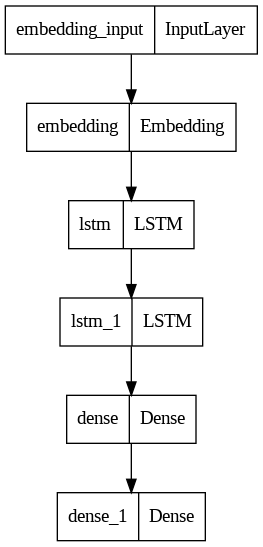

In [ ]:
from tensorflow import keras
from keras.utils.vis_utils import plot_model 

keras.utils.plot_model(model,to_file='plot.png',show_layer_names = True)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint 

checkpoint = ModelCheckpoint("next_words.h5",monitor='loss',verbose =1, save_best_only = True)
model.compile(loss="categorical_crossentropy",optimizer = Adam(learning_rate=0.001))
model.fit(X,y,epochs=40,batch_size=64,callbacks=[checkpoint])

Epoch 1/40
501/501 [==============================] - ETA: 0s - loss: 6.1891
Epoch 1: loss improved from inf to 6.18914, saving model to next_words.h5
501/501 [==============================] - 249s 490ms/step - loss: 6.1891
Epoch 2/40
501/501 [==============================] - ETA: 0s - loss: 5.8077
Epoch 2: loss improved from 6.18914 to 5.80772, saving model to next_words.h5
501/501 [==============================] - 245s 488ms/step - loss: 5.8077
Epoch 3/40
501/501 [==============================] - ETA: 0s - loss: 5.5091
Epoch 3: loss improved from 5.80772 to 5.50906, saving model to next_words.h5
501/501 [==============================] - 241s 481ms/step - loss: 5.5091
Epoch 4/40
501/501 [==============================] - ETA: 0s - loss: 5.2489
Epoch 4: loss improved from 5.50906 to 5.24889, saving model to next_words.h5
501/501 [==============================] - 248s 495ms/step - loss: 5.2489
Epoch 5/40
501/501 [==============================] - ETA: 0s - loss: 5.0186
Epoch 5: lo

In [ ]:
from tensorflow.keras.models import load_model 
import numpy as np 
import pickle 

model = load_model('next_words.h5')
tokenizer = pickle.load(open('token.pkl','rb'))

def Predict(model,tokenizer,text):
  
  sequence = tokenizer.texts_to_sequences([text])
  sequence = np.array(sequence)
  preds = np.argmax(model.predict(sequence))
  predicted_word = ""

  for key,value in tokenizer.word_index.items():
    if value == preds:
      predicted_word = key 
      break 
  print(predicted_word)
  return predicted_word 

In [ ]:
 while(True):
   text = input("Enter your line: ")
   if text == "0":
     print("Done")
     break 
    else:
      try:
        text = text.split(" ")
        text = text[:3]
        print(text)

        Predict(model,tokenizer,text)
      except Exception as e:
        print("ERROR",e)
        continue 

['Jose', 'Mernandez']
1/1 [==============================] - 0s 89ms/step
men
['of', 'people', 'below']
1/1 [==============================] - 0s 36ms/step
them
['the', 'clerk', 'in']
1/1 [==============================] - 0s 32ms/step
the
['Tank']
1/1 [==============================] - 0s 24ms/step
the
['']
ERROR in user code:

    File "/usr/local/lib/python3.8/dist-packages/keras/engine/training.py", line 1845, in predict_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.8/dist-packages/keras/engine/training.py", line 1834, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.8/dist-packages/keras/engine/training.py", line 1823, in run_step  **
        outputs = model.predict_step(data)
    File "/usr/local/lib/python3.8/dist-packages/keras/engine/training.py", line 1791, in predict_step
        return self(x, training=False)
    File "/usr/local/lib/python3.8/dist-packag